# <center> Chopra Agamdeep F21 CS559 HW1 </center> 

### <center> Due: **9/23/2021 Thursday 11:59 PM** </center>



- Before you start, rename the file as *LastNameFirstName*_F21_CS559_HW1 (e.g., JangInsuk_F21_CS559_HW1). 
- Submit the assignment both in format of *ipynb* and *html*. 
    - Export the file as *HTML* as `File`>`Download as`>`HTML`. 
    - Do not need to print results of middle-process work. Only the final answers must be printed while all lines must be excuted. 
    - Clean up unnecessary lines and codes with errors. 
    - Use *Markdown* to explain answers and results. 
    - **Do not need to compress** the files. You can submit files individually.
    - Only one time submission is allowd 
- This assignment focuses on topics of linear algebra, probability theory, and EDA. 
    - For linear algebra questions, when the question says "implement", you are not allowed to use any built-in functions from `NumPy` or similar libraries that do the job. (e.g., if the question is to implement dot prodcut function, do not use `numpy.dot`). 
- This assignment should an individual work. Do not collaborate with classmates or get help from 3rd person. You may surf internet if you need to. Then site the reference. 

### Problem 1 [20 pts]
This problem task to implement functions of matrix operations - multiplication and tranpose. Please do not use numpy matrix packages in implementations.  

1-a: Implement a function `mat_product` to calculate the matrix product of two n by n arrays. [8 pts] 
$$C_{ij}=\sum_{i,j,k=1}^nA_{ik}B_{kj}$$

In [1]:
import numpy as np

In [2]:
### Code Starts Here
def mat_product(A,B):
    C = []
    for i in range(len(A)):
        C.append([])
        for j in range(len(B[0])):
            C[-1].append(0.)
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]
    return C

1-b Generate two random 3 by 3 matrices, ${\bf X}$ and ${\bf Y}$, whose elements are from 0 to 10. Print the result. [2 pts]

In [3]:
### Test Starts Here
np.random.seed(123)
X=np.random.randint(11,size=(3,3))
Y=np.random.randint(11,size=(3,3))

In [4]:
print(mat_product(X,Y))

[[18.0, 26.0, 36.0], [30.0, 41.0, 36.0], [3.0, 13.0, 135.0]]


In [5]:
print(np.matmul(X,Y))

[[ 18  26  36]
 [ 30  41  36]
 [  3  13 135]]


1-c Inplement a function `mat_transpose()` that transposes ${\bf X}$ and use the `mat_product` function to find the matrice of product: $Z={\bf X}^T\cdot{\bf Y}$. Compare the result with using `np.matmul()`. [10 pts]


In [6]:
### Code Starts Here
def mat_transpose(X):
    X_T = []
    for i in range(len(X[0])):
        X_T.append([])
        for j in range(len(X)):
            X_T[-1].append([])
            X_T[i][j] = X[j][i]
    return X_T

In [7]:
Z=mat_product(mat_transpose(X),Y)
print(Z)

[[27.0, 38.0, 27.0], [18.0, 26.0, 45.0], [3.0, 10.0, 144.0]]


In [8]:
### Code np.matmul() starts here
Z=np.matmul(X.T,Y)
print(Z)

[[ 27  38  27]
 [ 18  26  45]
 [  3  10 144]]


### Problem 2 [20 pts]
2-a: Create a simulatior `coin_prob(pi,n,k)` for $n$ fair coins (whose probability is $\pi=0.5$) flipping $N$ times with the number of trials increase by the intervals of 50, $t=50,100,150,200,\cdots,10000$, having $k$ number of heads. [10 pts]

   - Use the sample data to compute the maximum likelihood estiamte probabilty $s$, `np.random.binomial()`, of $\pi$.
   - Have the simulator return the result of $t$ and $s$ as a data frame "ProbTable". 
   

In [9]:
### Code Starts Here
import pandas as pd
from tqdm import trange
def coin_prob(pi,n,k):
    """
    Simulator to calculate a probability of n coins 
    flipping N times with t trials having k number of heads: head (=1)
    """
    #To find-> P(k_H) for n coins tossed N times with p(H)=pi per coin toss.
    #Map results for each trial to ProbTable
    Ls = []
    heads=[]
    for N in trange(50, 10000 + 1, 50):
        Ls.append([])
        Ls[-1].append(N)
        success = 0
        for t in range(N):
            if(k==np.random.binomial(n, pi)):
                success += 1
        Ls[-1].append(success/N)
    ProbTable=pd.DataFrame(Ls, columns = list('ts'))
    return(ProbTable)

2-b: Test the simulator when $n=1$ and $k=1$. Plot the estimates of $\pi$ as a function of sample size. Indicate the expected probability using a horizontal line. [5 pts]

In [10]:
one_coins=coin_prob(pi=0.5,n=1,k=1)

100%|██████████| 200/200 [00:02<00:00, 73.38it/s]


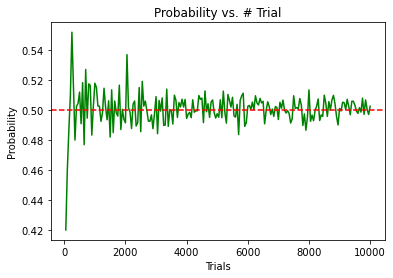

In [11]:
### Code Starts Here
import matplotlib.pyplot as plt

plt.plot(one_coins.t, one_coins.s, 'g-')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.xlabel('Trials')
plt.ylabel('Probability')
plt.title('Probability vs. # Trial')
plt.show()

2-c: Calculate the probability of having **1 head ($k=1$)** when 3 coins are flipped. Report the expected value.  [5 pts]

In [12]:
### Code starts here
k = 1
n = 3
pi = 0.5

P_h_1 = n / (2**n)

print("Probability of 1 head if 3 coins are tossed =", P_h_1)

Probability of 1 head if 3 coins are tossed = 0.375


2-d: Evaluate your answer in 3-c using the simulator. Show a plot that supports your evaluation. [3 pts]

In [13]:
three_coins=coin_prob(pi=0.5,n=3,k=1)

100%|██████████| 200/200 [00:02<00:00, 70.64it/s]


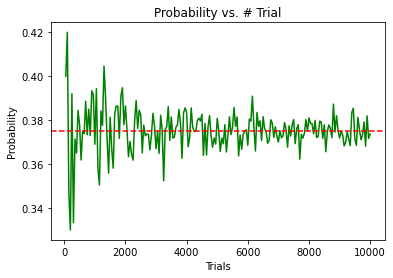

In [14]:
"""Plot shows here"""
plt.plot(three_coins.t, three_coins.s, 'g-')
plt.axhline(y=0.375, color='r', linestyle='--')
plt.xlabel('Trials')
plt.ylabel('Probability')
plt.title('Probability vs. # Trial')
plt.show()

### Problem 3 [20 pts]

Load the Gross Domestic Product data for the 190 ranked countries in the file **GDP.csv**. Load **Country.csv** into a DataFrame. 

In [15]:
gdp = pd.read_csv('GDP.csv', skiprows=range(5), header= None, usecols=[0,1,3,4], nrows=190,encoding='ISO-8859-1')
gdp.columns = ['CountryCode', 'Rank', 'CountryName', 'GDP']
Country = pd.read_csv('Country.csv',encoding='ISO-8859-1')

3-a: Match the `CountryCode` and merge two data frames. Call the new data frame as `Country_GDP`. How many of the IDs match?
Use the link for hints: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html [5 pts]

In [16]:
### Code Starts Here
Country_GDP=pd.merge(Country,gdp,on='CountryCode')

In [17]:
### Print the number of IDs
print(len(Country_GDP))

189


3-b: Use visualization to determine the number of countries by `Region`. Which region has the largest number of countries? [5 pts]

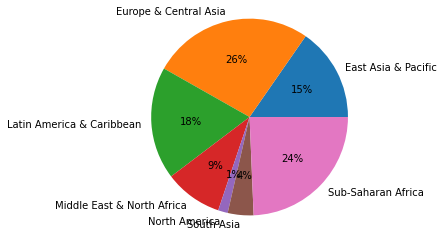

In [18]:
### Code Starts Here
num_country_by_region = Country_GDP.groupby(['Region'])['CountryName'].count()
fig,ax = plt.subplots()
ax.pie(num_country_by_region,labels = num_country_by_region.index, autopct='%d%%')
ax.axis('equal')
plt.show()
# Europe & Central Asia have the largest number of countries.

$\color{red}{\text{Use bar plot - this shows the percentage, not the number of countries. (-2)}}$

Europe & Central Asia have the largest number of countries.

3-c: Test how GDPs are alike between regions using two-sample **Kolmogorov-Smirnov** test `ks_2samp()`. Make a data table show $KS-test$ and $p-$ values. Evalueate the result. Expian which regions have similar distributions. [5 pts]

100%|██████████| 7/7 [00:00<00:00, 128.39it/s]


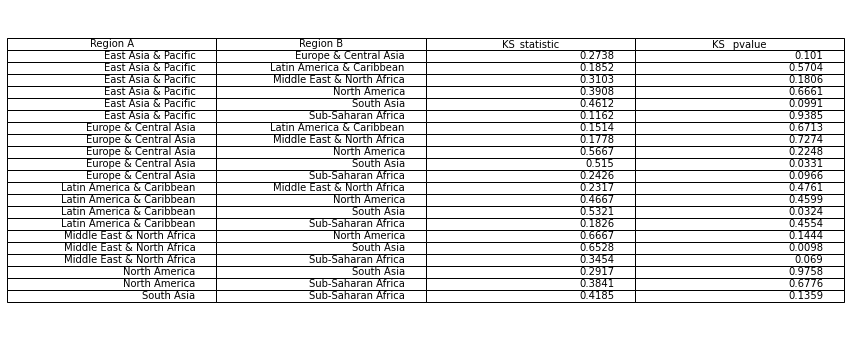

In [19]:
### Code Starts Here
from scipy.stats import ks_2samp
flag = True
dt = []
for i in trange(len(num_country_by_region)):
    a = Country_GDP[Country_GDP['Region'] == num_country_by_region.index[i]]['GDP']
    for j in range(len(num_country_by_region)):
        b = Country_GDP[Country_GDP['Region'] == num_country_by_region.index[j]]['GDP']
        for l in dt:
            if num_country_by_region.index[i] in l and num_country_by_region.index[j] in l:
                flag = False
        if flag:
            dt.append([])
            dt[-1].append(num_country_by_region.index[i])
            dt[-1].append(num_country_by_region.index[j])
            b = ks_2samp(a,b)
            dt[-1].append(round(b.statistic,4))
            dt[-1].append(round(b.pvalue,4))
        flag = True

dt.pop(0)
cols = ['Region A', 'Region B', 'KS_statistic', 'KS_ pvalue']

f, a = plt.subplots(figsize=(15,6))
f.patch.set_visible(False)
a.axis('off')
df = pd.DataFrame(dt, columns=cols)
a.table(cellText=df.values, colLabels=df.columns, loc='center')
plt.show()

#South Asia & Sub-Saharan Africs, Latin America & Europe, and Middle East & Europe and Central Asia seem to have similar distributions to some extent since all 3 combinations have high p-value and relatively low ks-static.

South Asia & Sub-Saharan Africs, Latin America & Europe, and Middle East & Europe and Central Asia seem to have similar distributions to some extent since all 3 combinations have high p-value and relatively low ks-statistic.

3-d: Use `groupby()` and `agg()` to find the average and standard deviation of GDP by `income group`. [5 pts]

In [20]:
### Code Starts Here
#s = Country_GDP.groupby('Region')#.agg('mean')
#s
Country_GDP=pd.merge(Country,gdp,on='CountryCode')
c = Country_GDP
c['GDP'] = c.GDP.str.replace(',', '').astype(float)
c.groupby(['Income Group'])['GDP'].agg(mean_gdp='mean',std_gdp='std')

,mean_gdp,std_gdp
Income Group,,
High income: OECD,1.483917e+06,3.070464e+06
High income: nonOECD,1.043498e+05,1.653344e+05
Low income,1.441078e+04,2.047309e+04
Lower middle income,2.566635e+05,1.139620e+06
Upper middle income,2.318478e+05,4.768720e+05


### Problem 4 - Clustering Using KMeans [20 pts]

The tasks in this problem are:
- impletemenation of KMeans
- confirmation of pre-determined K value

Here, we have a given data set `HW1_Q1_0.csv` containing coordinates of x and y. 

4-a. Load the data and add feature name as X and Y for the first and second columns, respectively. (2 pts)

In [21]:
import pandas as pd

In [22]:
### Code starts here
df = pd.read_csv('HW1_Q1_0.csv')
df.columns = ['X', 'Y']
df

,X,Y
0,-0.169793,1.073745
1,1.128729,-2.395042
2,0.122506,-0.973069
3,-0.409200,0.129649
4,0.476229,-0.048147
...,...,...
819,0.944727,0.365376
820,-0.161625,-0.358271
821,0.147787,0.905077
822,-0.159311,0.425800


4-b. Using `KMeans` from `sklearn.cluster`, determine the appropriate $K$ value for `HW2_Q1_0.csv` and report it. Explain why your pre-determined $K$ value is appropriate. The function `plot_inertia` is provided to you. (4 pts)

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans()

def plot_inertia(km, X, n_cluster_range):
    inertias = []
    for i in n_cluster_range:
        km.set_params(n_clusters=i)
        km.fit(X)
        inertias.append(km.inertia_)
    plt.plot(n_cluster_range, inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
    
    tabular_result = pd.DataFrame(inertias, 
                                  index = ["n = {}".format(i) for i in range(1, len(inertias)+1)], 
                                  columns=['Inertia'])
    
    return tabular_result

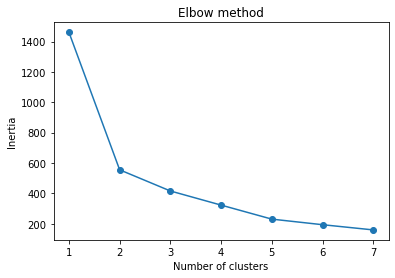

,Inertia
n = 1,1461.526463
n = 2,555.212132
n = 3,415.754441
n = 4,322.689932
n = 5,230.307761
n = 6,193.548412
n = 7,159.232545


In [24]:
### Code starts here
plot_inertia(kmeans, df, list(range(1,8)))

The K value appears to be around 4. This means that there might be 4 possible clusters in the given dataset. This was estimated using the elbow method. Since the plot appears to decrease linearly after 4 clusters.

$\color{red}{\text{Try until K=10. You will notice that the change of inertia becomes steady when n=5. The appropriate k value is 6 (-3)}}$

4-c. Make a scatter plot of y vs. x. Do you think your pre-determined $K$ value is acceptable. Explain why. If you do not think your pre-determined $K$ value is not correct, explain what a new pre-determined $K$ value must be. (4 pts) 

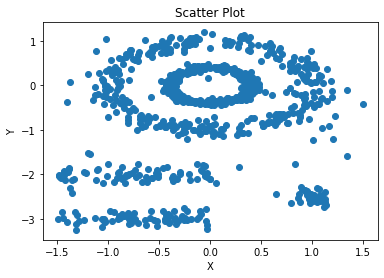

In [25]:
### Code starts here
plt.scatter(df['X'],df['Y'])
plt.title('Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

It appears that the predicted value for the # of clusters 4 is not the same as the visualization, which seems to be 5 discrete structures. One reason may be that KMean relies on optimizing the centroid values in the original coordinate system. This approach WILL fail for a complex nonlinear dataset like the above. Hence a stronger algorithm is required to properly transform the dataset into a much simpler coordinate system for clustering. A deep neural network might be able to achieve this task.

4-d. Impletement `MY_KMean` that does the KMeans clustering. When you do the implementation, you may use linear algebra built-in functions from `Numpy`. Do not use `KMeans` directly. (10 pts)

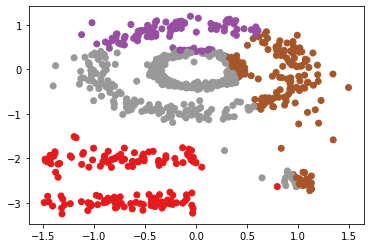

In [26]:
### Code starts here
df = pd.read_csv('HW1_Q1_0.csv')
df.columns = ['X', 'Y']

def MY_KMean(x, n_clusters):
    loop = 200
    x = x.to_numpy()
    centroids =  x[np.random.choice(len(x),n_clusters,replace=False)]
    dist = np.zeros((centroids.shape[0], len(x)))
    group_hist = []
    centr_hist = []
    for l in range(loop):
        centr_hist.append(centroids)
        for i in range(len(centroids)):
            for j in range(len(x)):
                dist[i,j] = np.linalg.norm(x[j]-centroids[i])
        group_list = np.argmin(dist, axis=0)
        group_hist.append(group_list)
        if l != loop-1:
            for i in range(k):
                centroids[i] = np.mean(x[np.where(group_list==i),:])
    return group_list, centroids#, group_hist, centr_hist

#gp,cent, histG, histC = MY_KMean(df, 3)
gp,_ = MY_KMean(df, 4)
df.insert(2,'group',gp)
plt.scatter(df.X, df.Y, c=df.group, cmap='Set1')
plt.show()

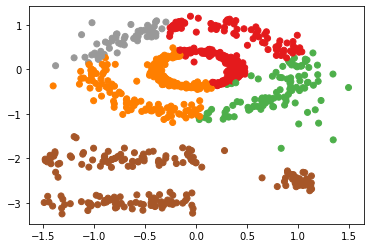

In [27]:
df = pd.read_csv('HW1_Q1_0.csv')
df.columns = ['X', 'Y']
gp,_ = MY_KMean(df, 5)
df.insert(2,'group',gp)
plt.scatter(df.X, df.Y, c=df.group, cmap='Set1')
plt.show()

### Problem 5 - Principal Component Analysis [20 pts]

5-a. Run the following codes. 

In [28]:
import numpy as np

np.random.seed(2342)
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 30).T
assert class1_sample.shape == (3,30), "The matrix has not the dimensions 3x30"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 30).T
assert class2_sample.shape == (3,30), "The matrix has not the dimensions 3x30"

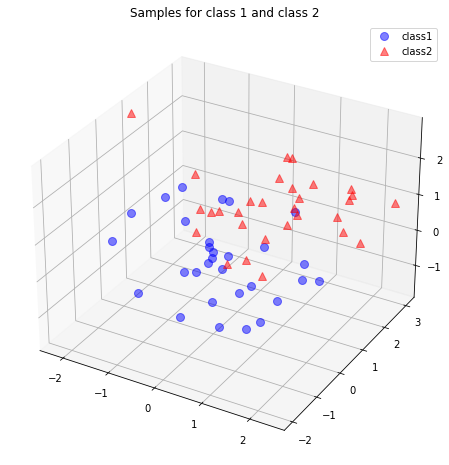

In [29]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

5-b. PCA Implementation. Here, the descriiption of each step and part of codes. You have to fill out the rest process. [15 pts]

1. Take the dataset w/o classes. 
2. Compute the d-dimentional mean vector.
3. Compute the scatter matrix as following. 
    
$$\textbf{S}=\sum_{k=1}^N (\textbf{x}_k-\bar{\textbf{x}})(\textbf{x}_k-\bar{\textbf{x}})^T$$ 
where $\bar{\textbf{x}}$ is the mean vector. Then compute the covariance matrix using `np.cov()` function.
    
4. Compute eigenvectors and corresponding eigenvalues using np.linalg.eig(). 
5. Check the eigenvector and eigenvalue calculation. This code is provided as well as the visualization of eigenvectors. 
6. Sort the eigenvectors by descreasing eigenvalues. The idea is that since the eigenvectors will form the axes of new feature subspace, we want to drop for eigenvectors with the lowest eigenvalues that bear the least information about the distribution of the data. 
7. Choose $k$ eigenvectors with the largest eigenvalues. We are going to reduce a 3-D feature space to a 2-D feature subspace. To do so, we combine the two eigenvectors with the highest eigenvalues to construct our $d\times k$-D eigenvector matrix $\bf{W}$.
8. Transform the samples onto the new subspace. The new subspace equation is 

$${\bf y}={\bf W}^T\times {\bf x}$$

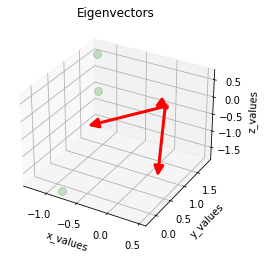

(60, 3) (60, 2)


In [30]:
### Code starts here
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self,xs,ys,zs,*args, **kwargs):
        FancyArrowPatch.__init__(self,(0,0),(0,0),*args, **kwargs)
        self._verts3d = xs,ys,zs
    def draw(self,renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs,ys,zs = proj3d.proj_transform(xs3d,ys3d,zs3d,renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self,renderer)

x = np.concatenate((class1_sample,class2_sample), axis=1).T
x_mean = np.mean(x,axis=0)
S = np.dot((x-x_mean).T,(x-x_mean))
C = np.cov(S)#, rowvar = False)
e_val, e_vect = np.linalg.eigh(C)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(x[0,:],x[1,:],x[2,:],'o',markersize=8,color='g',alpha=0.2)
ax.plot(x_mean[0],x_mean[1],x_mean[2],'o',color='r',alpha=0.5)
for v in e_vect.T:
    a=Arrow3D([x_mean[0],v[0]],[x_mean[1],v[1]],[x_mean[2],v[2]], mutation_scale=20,lw=3,arrowstyle='-|>',color='r')
    ax.add_artist(a)    
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')
plt.title('Eigenvectors')
plt.show()

e_vect = e_vect[np.argsort(e_val)[::-1],:]
W = e_vect[:,:2]
y = np.dot(W.T, x.T).T
print(x.shape,y.shape)

5-c. Using `PCA` from sklearn, make a visualization comparison with the result in 3-b and evaluation your impletemented PCA. [5 pts]

In [31]:
from sklearn.decomposition import PCA

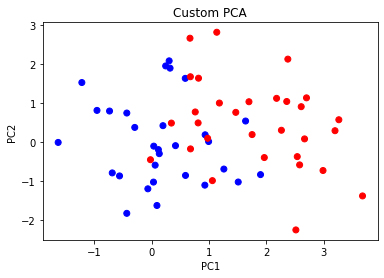

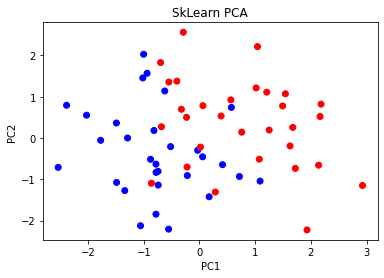

In [32]:
### Code starts here
clrA = []
clrB = []
for i in range(len(x)):
    if i < 30:
        clrA.append('b')
        clrB.append('b')
    else:
        clrA.append('r')
        clrB.append('r')
pca = PCA(n_components=2)
y_sk = pca.fit_transform(x)
plt.scatter(y[:,0],y[:,1], color=clrA)
plt.title('Custom PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
plt.scatter(y_sk[:,0],y_sk[:,1], color=clrB)
plt.title('SkLearn PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

The sklearn PCA decomposition seems to be close to the manual PCA decomposition method, although some deviations can be observed. This might be a result of how sklearn and numpy handel floating point calculations or some algorithmic choices to improve sklearn pca performance. Overall, the custom/manual PCA decomposition seems to be fairly accurate.